# PHYS481 Assignment \#1

## Brian Jackel

This Jupyter notebook contains answers to questions posed during the first week of physics 481 Fall 2018.
This assigment is primarily intended as a review of basic Python programming.

In [1]:
# There are several packages which get used so frequently that
# we should just include them automatically.
#
import numpy as np

# tools for plotting with "magic" (%) ipython configuration
#
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1: What are the differences between lists and tuples?

Tuples are immutable and cannot be changed once they are created.  Lists are mutable, so list elements can be inserted, removed, or modified. 

In [2]:
a = [0, 1]   # square braces for a list
b = (2, 3)   # round braces for a tuple

In [3]:
# Use "set" operations to determine which methods are common to both lists and tuples.
#
#
print('tuple and list: ', set( dir(()) ) & set( dir([]) ) )
print('\ntuple only: ', set( dir(()) ) - set( dir([]) ) )
print('\nlist only: ',  set( dir([]) ) - set( dir(()) ) )

tuple and list:  {'__str__', '__reduce__', '__contains__', '__iter__', '__eq__', '__format__', '__rmul__', '__sizeof__', '__repr__', '__getattribute__', '__mul__', '__len__', '__le__', '__add__', 'count', '__subclasshook__', '__delattr__', '__dir__', '__class__', '__doc__', '__init__', '__reduce_ex__', '__init_subclass__', '__lt__', '__gt__', '__setattr__', '__ge__', '__getitem__', '__hash__', '__ne__', 'index', '__new__'}

tuple only:  {'__getnewargs__'}

list only:  {'__setitem__', 'extend', 'sort', '__imul__', '__iadd__', 'insert', 'remove', 'append', 'clear', 'pop', 'reverse', '__delitem__', 'copy', '__reversed__'}


Use the \_\_sizeof\_\_ method to show that an empty tuple requires roughly half the memory of an empty list.

In [4]:
print('Empty tuple, list: ',().__sizeof__(), [].__sizeof__() )
print('Small tuple, list: ',(1).__sizeof__(), [1].__sizeof__() ) 

Empty tuple, list:  24 40
Small tuple, list:  28 48


Creating a small tuple is *much* faster than making the equivalent list.

In [5]:
%timeit (i for i in range(99))
%timeit [i for i in range(99)]

411 ns ± 10.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.14 µs ± 33.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
# It can be interesting to look at how Python commands are compiled to low-level byte-codes.
# (See also ".pyc" files)

from dis import dis
dis(compile("(10, 'abc')", '', 'eval'))
print('\n')
dis(compile("[10, 'abc']", '', 'eval'))

  1           0 LOAD_CONST               2 ((10, 'abc'))
              2 RETURN_VALUE


  1           0 LOAD_CONST               0 (10)
              2 LOAD_CONST               1 ('abc')
              4 BUILD_LIST               2
              6 RETURN_VALUE


### Question 2

In earlier versions of Python the default integer type was a fixed size (64-bits), making it somewhat more challenging to calculate 52! (factorial).  Now it is trivial:

In [7]:
import math
math.factorial(52)

80658175170943878571660636856403766975289505440883277824000000000000

For completeness, we could try writing our own functions and compare the run times.

In [8]:
def recursive_factorial(n):
    """ calculate n! recursively (slow)
    """
    if n <= 1:
        return 1
    
    return n*recursive_factorial(n-1)

assert( recursive_factorial(52) == math.factorial(52) )

In [9]:
def simple_factorial(n):
    """ calculate n! in a loop
    """
    result = 1
    for i in range(1,n+1):
        result = result*i
        
    return result

def optimized_simple_factorial(n):
    """ calculate n! in a loop
    try to avoid unnecessary work
    """
    result = int(n)
    for i in range(2,n):
        result = result * i
        
    return result

assert( simple_factorial(52) == math.factorial(52) )
assert( optimized_simple_factorial(52) == math.factorial(52) )

In [10]:
%timeit math.factorial(52)
%timeit simple_factorial(52)
%timeit optimized_simple_factorial(52)   #!! Suprise !!   Why does this take longer than "simple_factorial" ??
%timeit recursive_factorial(52)

411 ns ± 26.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.29 µs ± 22 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.26 µs ± 39.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.79 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 2) Overhand shuffle

There appears to be some ambiguity regarding how exactly to perform an overhand shuffle.  For the purposes of this report, it shall be defined as follows:
 (1) a "block" of $N$ cards is taken from the top of the deck and is used as the basis for a new shuffled deck
 (2) a second block of $N$ cards is taken from the top of the original deck and placed on top of the new deck
 (3) step (2) is repeated until all the cards are on the new deck

In [11]:
def overhand_shuffle(deck, blocksize=8):
    result = []
    while len(deck)>0:
        blocksize = np.min( [blocksize, len(deck) ])
        block = list( deck[0:blocksize] )
        block.extend(result)
        result = block[:]
        deck = deck[blocksize:]
    
    return result
    
    
deck = np.arange(52)    
deck = overhand_shuffle(deck, 8)
print(deck)

[48, 49, 50, 51, 40, 41, 42, 43, 44, 45, 46, 47, 32, 33, 34, 35, 36, 37, 38, 39, 24, 25, 26, 27, 28, 29, 30, 31, 16, 17, 18, 19, 20, 21, 22, 23, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7]


In [12]:
deck = np.arange(52)
for indx in range(1,14):
    deck = overhand_shuffle(deck)
    print(indx, deck[0:9],'...',deck[-5:])

1 [48, 49, 50, 51, 40, 41, 42, 43, 44] ... [3, 4, 5, 6, 7]
2 [4, 5, 6, 7, 12, 13, 14, 15, 0] ... [51, 40, 41, 42, 43]
3 [40, 41, 42, 43, 32, 33, 34, 35, 48] ... [7, 12, 13, 14, 15]
4 [12, 13, 14, 15, 20, 21, 22, 23, 4] ... [43, 32, 33, 34, 35]
5 [32, 33, 34, 35, 24, 25, 26, 27, 40] ... [15, 20, 21, 22, 23]
6 [20, 21, 22, 23, 28, 29, 30, 31, 12] ... [35, 24, 25, 26, 27]
7 [24, 25, 26, 27, 16, 17, 18, 19, 32] ... [23, 28, 29, 30, 31]
8 [28, 29, 30, 31, 36, 37, 38, 39, 20] ... [27, 16, 17, 18, 19]
9 [16, 17, 18, 19, 8, 9, 10, 11, 24] ... [31, 36, 37, 38, 39]
10 [36, 37, 38, 39, 44, 45, 46, 47, 28] ... [19, 8, 9, 10, 11]
11 [8, 9, 10, 11, 0, 1, 2, 3, 16] ... [39, 44, 45, 46, 47]
12 [44, 45, 46, 47, 48, 49, 50, 51, 36] ... [11, 0, 1, 2, 3]
13 [0, 1, 2, 3, 4, 5, 6, 7, 8] ... [47, 48, 49, 50, 51]


## 3) Repeated riffle shuffles

A sequence of 7 perfect riffle shuffles will apparently sort the deck so that the first half contains all the even cards in order followed by all the odd cards in order.  One more iteration will return the deck to its original configuration.

In practice, the riffle shuffle actually seems to randomize the deck fairly well.  This is presumably due to some combination of factors:
#) the deck isn't split exactly in half
#) the first card may be from either the left or right hand
#) instead of perfectly alternating single cards between left and right, there may be gaps or multiple cards 

In [13]:
def riffle_shuffle(deck):
    """ This function changes the order of a sequence 
    by dividing it into two sections and merging them
    like shuffling a deck of cards.
    """
       
    ncards = len(deck)
    assert( (ncards %2) == 0 )
    #assert( ncards == 52 )
    
    nhalf = ncards//2
    half0 = deck[0:nhalf]
    half1 = deck[nhalf:]
   
    result = []
    for indx in range( nhalf ):
        result.append( half0[indx] )
        result.append( half1[indx] )
        

    return result
        
deck = range(52)[:]
deck = riffle_shuffle(deck)
print(deck)

assert( deck[0:4] == [0,26,1,27] ) 

[0, 26, 1, 27, 2, 28, 3, 29, 4, 30, 5, 31, 6, 32, 7, 33, 8, 34, 9, 35, 10, 36, 11, 37, 12, 38, 13, 39, 14, 40, 15, 41, 16, 42, 17, 43, 18, 44, 19, 45, 20, 46, 21, 47, 22, 48, 23, 49, 24, 50, 25, 51]


In [14]:
deck = np.arange(52)
for indx in range(1,9):
    deck = riffle_shuffle(deck)
    print(indx, deck[0:9],'...',deck[-5:])    

1 [0, 26, 1, 27, 2, 28, 3, 29, 4] ... [49, 24, 50, 25, 51]
2 [0, 13, 26, 39, 1, 14, 27, 40, 2] ... [50, 12, 25, 38, 51]
3 [0, 32, 13, 45, 26, 7, 39, 20, 1] ... [25, 6, 38, 19, 51]
4 [0, 16, 32, 48, 13, 29, 45, 10, 26] ... [38, 3, 19, 35, 51]
5 [0, 8, 16, 24, 32, 40, 48, 5, 13] ... [19, 27, 35, 43, 51]
6 [0, 4, 8, 12, 16, 20, 24, 28, 32] ... [35, 39, 43, 47, 51]
7 [0, 2, 4, 6, 8, 10, 12, 14, 16] ... [43, 45, 47, 49, 51]
8 [0, 1, 2, 3, 4, 5, 6, 7, 8] ... [47, 48, 49, 50, 51]


## 4) Compare the computation time required for the two different implementations of catmap.

In [15]:
def catmap1(square):
    """Apply Arnold's cat map to a square NxN numpy array
    using loops to modify pixels one at a time.
    """
    
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)
    
    result = square.copy()
    for x in range(nx):
        for y in range(ny):
            xx = x + y
            yy = x + 2*y
            result[x,y] = square[xx % nx, yy % ny]
            
    return result

In [16]:
def catmap2(square):
    """
    Apply Arnold's cat map to a square NxN numpy array 
    using array indexing.
    """
    
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)
    
    x, y = np.arange(nx), np.arange(ny)
    xx, yy = np.meshgrid(x, y, sparse=False, indexing='ij')
    
    xx = xx + yy
    yy = yy + xx
    
    return square[xx % nx, yy % ny]  

In [18]:
# Use system clock to measure time delays
#
import time

n = 99
square = np.arange(n*n).reshape([n,n])

t0 = time.time()
for i in range(99):
    test = catmap1(square)
t1 = time.time()    
print('catmap1: ', (t1-t0)/99.0 )

t0 = time.time()
for i in range(99):
    test = catmap2(square)
t1 = time.time()    
print('catmap2: ', (t1-t0)/99.0 )

catmap1:  0.0023956973143298217
catmap2:  0.00024793364784934306


In [19]:
# factor repeated code into a function
#
def mytimeit(func, *args):
    t0 = time.time()
    for i in range(99):
        test = func(*args)
    t1 = time.time()
    return (t1-t0)/99.0

for func in [catmap1, catmap2]:
    print( str(func), mytimeit(func,square) )

<function catmap1 at 0x7f568a20b8c8> 0.002432864121716432
<function catmap2 at 0x7f5689f44950> 0.00023214744799064869


In [21]:
catmap1.name = 'catmap1'
catmap2.name = 'catmap2'
for func in [catmap1, catmap2]:
    print( func.name, mytimeit(func,square) )

catmap1 0.0024420059088504677
catmap2 0.00024235368979097616


In [22]:
# Use built-in timing routines.  The percent sign (%) is 
# a "magic" command in ipython and jupyter that provides
# a convenient interface to the "timeit" module.
#
%timeit test = catmap1(square)  # 25.5 ms per loop
%timeit test = catmap2(square)  # 1.82 ms per loop

2.22 ms ± 30.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
236 µs ± 2.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [23]:
def cycle_count(n, maxloops=999):
    
    square0 = np.arange(n*n).reshape(n,n)
    square = catmap2( square0.copy() )
    count = 1
    while np.any(square != square0):
        count += 1
        square = catmap2(square)
        if count > maxloops: break
            
    return count
    
    
test = cycle_count(64)
print(test)

#
#

48


In [24]:
nsquare = range(2, 256)
count = [ cycle_count(n) for n in nsquare ]

/home/bjackel/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


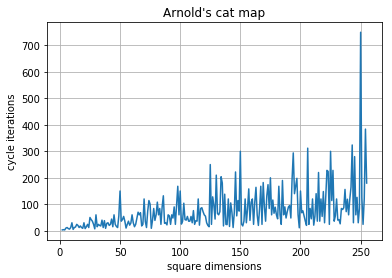

In [25]:
plt.plot( nsquare, count )
plt.title("Arnold's cat map")
plt.xlabel('square dimensions')
plt.ylabel('cycle iterations')
plt.grid('on')

## Summary
Trying to randomly shuffle cards with a deterministic algorithm does not seem to be very effective.

## 6) Optional - how does the catmap period depend on pixel?

In [26]:
### NaN is not a number

#if np.all(square == square0): print('perfect match')

if (3 == 3): print('3==3')
if (np.inf == np.inf): print('inf==inf')
if (np.nan == np.nan): print('nan=nan')

3==3
inf==inf


In [27]:
def catmap_cycles(nsquare, maxsteps=999):
    """
    Determine the periodicity for each pixel of
    Arnold's cat map.
    """
    
    nx = ny = nsquare
    assert (nx == ny & ny > 1)
    
    x, y = np.arange(nx), np.arange(ny)
    xx, yy = np.meshgrid(x, y, sparse=False, indexing='ij')
    
    xx0, yy0 = xx[:], yy[:]
    
    count = np.zeros( [nx,ny], dtype=np.int )
    for n in range(1,maxsteps):
        xx = ( xx + yy ) % nx
        yy = ( yy + xx ) % ny
        match = (xx == xx0) & (yy == yy0)
        count[match & (count==0)] = n
    
    return count

test = catmap_cycles(4)

In [28]:
print( catmap_cycles(9) )

[[ 1 12 12  4 12 12  4 12 12]
 [12 12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12 12]
 [ 4 12 12  4 12 12  4 12 12]
 [12 12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12 12]
 [ 4 12 12  4 12 12  4 12 12]
 [12 12 12 12 12 12 12 12 12]
 [12 12 12 12 12 12 12 12 12]]


In [29]:
print( catmap_cycles(10) )

[[ 1 30 10 30 10  3 10 30 10 30]
 [30 30 30  6 30 30 30 30  6 30]
 [10  6 10 30 10 30  2 30 10 30]
 [30 30 30 30  6 30 30 30 30  6]
 [10 30  2 30 10 30 10  6 10 30]
 [ 3 30 30 30 30  3 30 30 30 30]
 [10 30 10  6 10 30 10 30  2 30]
 [30  6 30 30 30 30  6 30 30 30]
 [10 30 10 30  2 30 10 30 10  6]
 [30 30  6 30 30 30 30  6 30 30]]


The upper left corner (0,0) always has a limit cycle of 1.

For the two cases N=9 and N=10 the lower right corner (N-1,N-1) always has the largest limit cycle.

Numerical experiments confirm this pattern continues up to N=49.  This does *not* prove anything, but does suggest that it might be worth a closer look.

In [30]:
for n in range(2,51):
    test = catmap_cycles(n)
    nunique = np.unique(test)
    print(n, nunique, test[-1,-1]==nunique[-1] )

2 [1 3] True
3 [1 4] True
4 [1 3] True
5 [ 1  2 10] True
6 [ 1  3  4 12] True
7 [1 8] True
8 [1 3 6] True
9 [ 1  4 12] True
10 [ 1  2  3  6 10 30] True
11 [1 5] True
12 [ 1  3  4 12] True
13 [ 1 14] True
14 [ 1  3  8 24] True
15 [ 1  2  4 10 20] True
16 [ 1  3  6 12] True
17 [ 1 18] True
18 [ 1  3  4 12] True
19 [1 9] True
20 [ 1  2  3  6 10 30] True
21 [1 4 8] True
22 [ 1  3  5 15] True
23 [ 1 24] True
24 [ 1  3  4  6 12] True
25 [ 1  2 10 50] True
26 [ 1  3 14 42] True
27 [ 1  4 12 36] True
28 [ 1  3  8 24] True
29 [1 7] True
30 [ 1  2  3  4  6 10 12 20 30 60] True
31 [ 1 15] True
32 [ 1  3  6 12 24] True
33 [ 1  4  5 20] True
34 [ 1  3 18] True
35 [ 1  2  8 10 40] True
36 [ 1  3  4 12] True
37 [ 1 38] True
38 [1 3 9] True
39 [ 1  4 14 28] True
40 [ 1  2  3  6 10 30] True
41 [ 1 20] True
42 [ 1  3  4  8 12 24] True
43 [ 1 44] True
44 [ 1  3  5 15] True
45 [ 1  2  4 10 12 20 60] True
46 [ 1  3 24] True
47 [ 1 16] True
48 [ 1  3  4  6 12] True
49 [ 1  8 56] True
50 [  1   2   3   6  10

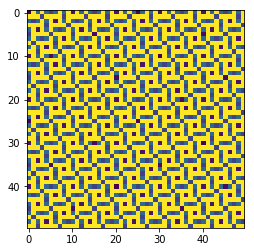

In [31]:
plt.imshow( catmap_cycles(50) )

### timeit is not magic

It can be very convenient to work interactively with the "magic" form of timeit 

    %timeit  do_something
    
but it can also be very tedious to gather results from different trials and compare them quantitatively.

Loading the `timeit` package allows us to automate multiple timing runs.

In [32]:
import timeit as tmt

t = tmt.timeit(stmt='math.factorial(52)', setup='import math')
print(t)

t = tmt.timeit(stmt='math.factorial(52)', globals=globals())
print(t)

0.36908522504381835
0.3798169519286603


In [33]:
x = 3
print( globals()['x'] )

3
